In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

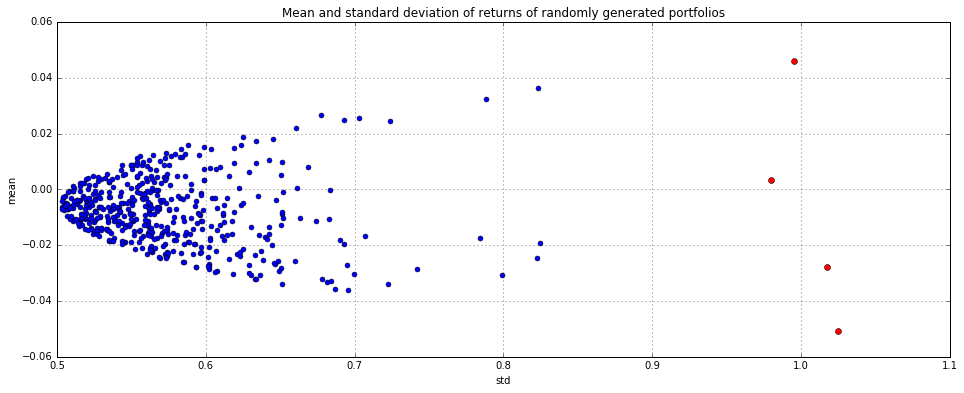

In [2]:
def portfolio_stats(assets, covariances):
    '''Return the mean and std of a portfolio with random weights'''
    w = np.random.rand(assets.shape[1])
    w = w / sum(w)
    mean = np.dot(w, assets.mean(axis=0))
    std = np.sqrt(w.dot(covariances).dot(w.T))
    return mean, std

def n_rand_porfolios(num_port=500, num_assets=4, t=1000, autoscale=True):
    '''Return mean and std of random portfolios with random weights over t periods'''
    assets = np.random.randn(t, num_assets)
    c = np.cov(assets.T)
    means, stds = np.column_stack([portfolio_stats(assets, c) for _ in xrange(num_port)])
    plot_portfolios(means, stds, assets, autoscale);
    return

def plot_portfolios(means, stds, assets, autoscale):
    '''Plot portfolios and individual assets'''
    fig = plt.figure(figsize=(16, 6))
    plt.plot(stds, means, 'o', markersize=5)
    plt.plot(assets.std(axis=0), assets.mean(axis=0), 'or')
    plt.xlabel('std')
    plt.ylabel('mean')
    plt.title('Mean and standard deviation of returns of randomly generated portfolios')
    if not autoscale:
        plt.xlim([0.3, 1.1])
        plt.ylim([-0.05, 0.05])
    plt.grid(True)
    plt.show()
    return

interact(n_rand_porfolios, num_port=(100, 1000, 100), num_assets=(1,100), t=fixed(1000));